In [1]:


import sciprog


# CircularQueue


## [Download exercises zip](../_static/generated/queues.zip) 

[Browse files online](https://github.com/DavidLeoni/sciprog-ds/tree/master/queues)

A circular queue is a data structure which when initialized occupies a **fixed** amount of memory called _capacity_.

* [Luca Bianco's theory slides](https://sciproalgo2020.readthedocs.io/en/latest/slides/Lecture5.pdf) 


## 1. Introduction 

Typically, fixed size data structures are found in systems programming (i.e. programming drivers), when space is constrained and you want predictable results as much as possible. For us, it will be an example of modular arithmetic usage.
In our implementation, to store data we will use a Python list, which we initialize with a number of empty cells equal to _capacity_. During initialization, it does't matter what we actually put inside cells, in this case we will use `None`.  Note that **capacity never changes**, and **cells are never added nor removed** from the list. What varies during execution is the actual content of the cells, the index pointing to the head of the queue (from which elements are dequeued) and another number we call _size_ which is a number telling us how many elements are present in the queue. Summing _head_ and _size_ numbers will allow us to determine where to enqueue elements at the tail of the queue - to avoid overflow, we will have to take modulus of the sum. Keep reading for details.

To implement the circular queue you can use this pseudo code: 

![circular queue pseudocode 34u3y](img/circular-queue-pseudocode.png)



**QUESTION**: Pseudo code is meant to give a general overview of the algorithms, and can often leave out implementation details, such as defining what to do when things don't work as expected. If you were to implement this in a real life scenario, do you see any particular problem or adaptation we could do to improve it? 

**QUESTION**: If we can insert any kind of object in the queue including `None`, are we going to have troubles with definitions like `top()` above?

**ANSWER**: In Python, if there is no `return` statement a function is intended to return `None`. Since that version of `top` method does nothing when size is zero, in that case it will implicitly return `None`. If we allow the user to insert `None` objects in the queue, when calling `top()` she will not know whether the returned object belonged to the queue, or the queue is actually empty. To prevent problems, it's often best to explicitly raise an exception as we will do in our implementation.

**In our implementation, we will:**

* use more pythonic names, with underscores instead of camelcase.
* explicitly handle exceptions and corner cases
* be able to insert any kind of object in the queue
* Initial queue will be populated with `None` objects, and will have length set to provided capacity
* `_size` is the current dimension of the queue, which is different from the initial provided `capacity`.
* we consider `capacity` as fixed: it will never change during execution. For this reason, since we use a Python list to represent the data, we don't need an extra variable to hold it, just getting the list length will suffice.
* `_head` is an _index_ pointing to the _next_ element to be dequeued
* elements are inserted at the position pointed to by `(_head + _size) % capacity()`, and dequeued from position pointed by `_head`. The module `%` operator allows using a list as it were circular, that is, if an index apparently falls outside the list, with the modulus it gets transformed to a small index. Since `_size` can never exceed `capacity()`,  the formula `(_head + _size) % capacity()` never points to a place which could overwrite elements not yet dequeued, except cases when the queue has `_size==0` or `_size==capacity()` which are to be treated as special.
* enqueuing and dequeing operations **don't** modify list length !

## 2. Example

In [2]:
from circular_queue_sol import CircularQueue

At the beginning, we declare the capacity `7`, filling an array of seven cells with `None` values:

In [3]:
q = CircularQueue(7)

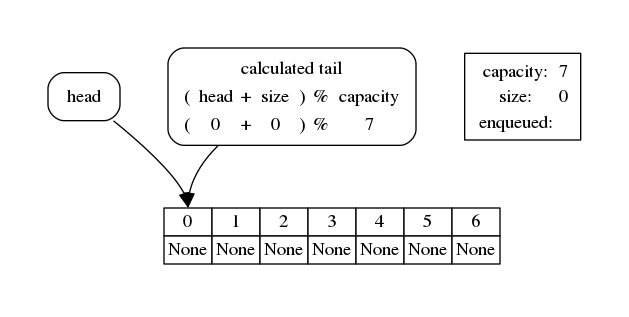

In [4]:
from sciprog import draw_circular_queue
draw_circular_queue(q)

Note that tail pointer always points to the _next_ available cell where a new enqueued item will be placed. For now, you can ignore the `% capacity` operator, just focus on the `head + size` part:

In [5]:
q.enqueue('a')

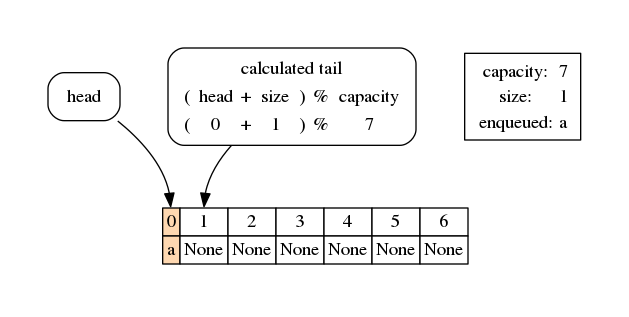

In [6]:
draw_circular_queue(q)

As expected, we see that `tail` now points to index `1`, the next place where we will enqueue new arrivals:

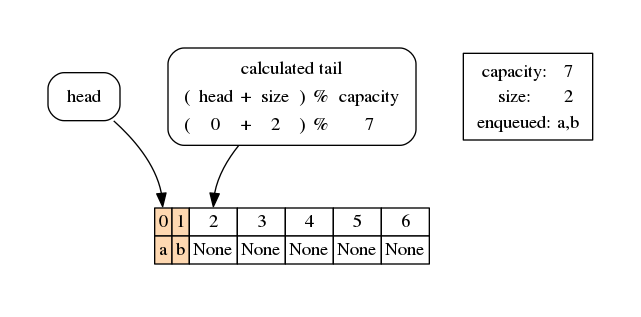

In [7]:
q.enqueue('b')
draw_circular_queue(q)

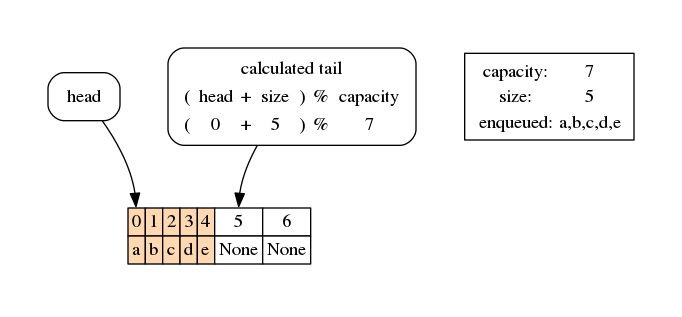

In [8]:
q.enqueue('c')
q.enqueue('d')
q.enqueue('e')

draw_circular_queue(q)

Let's say we want to dequeue one guy: dequeuing always happens at the head pointer:

In [9]:
q.dequeue()

'a'

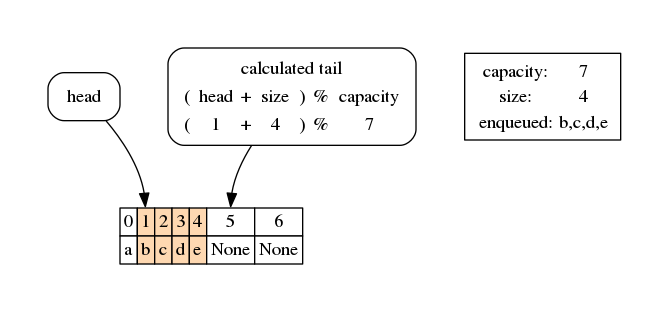

In [10]:
draw_circular_queue(q)

Notice how the `dequeue` method _returned_ the item `'a'`, so to make it available to whoever calls the method, yet `'a'` is _still_ present inside the array and `head` index was moved forward. The reason is that once the head is moved, we won't care anymore about cells outside the enqueued elements span,  so there is no need to waste a writing operation to overwrite the `'a'` with a `None`.

In [11]:
q.dequeue()

'b'

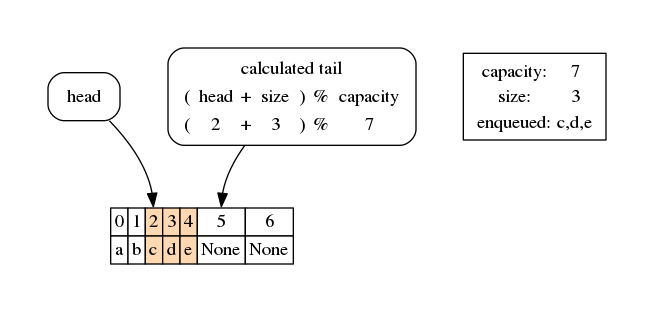

In [12]:
draw_circular_queue(q)

Let's try now to enqueue more stuff:

In [13]:
q.enqueue('f')

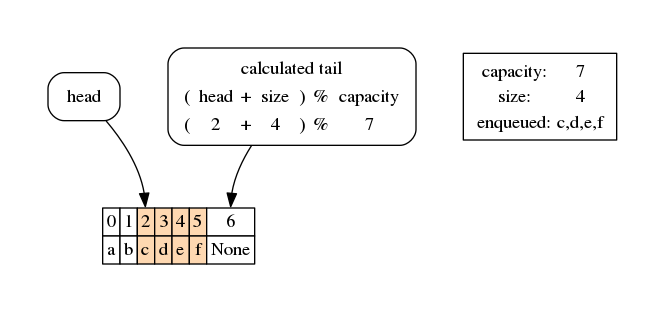

In [14]:
draw_circular_queue(q)

Now we reached a critical position, and we must decide what happens when we enqueue again. Since the tail is supposed to always point to the next available cell for enqueuing, as soon as we enqueue an item here the last cell will be filled and we will need to move the tail... somewhere. If you remember, we said that the items outside the span between the head and the tail are considered as removed from the queue and can be safely overwritten. So we can set the tail to the other side of the array, at zero index (hence the _circular_ queue). Now, how to obtain index `0` ? We could use some `if` command, but it turns out math already provides us with a handy operator called _modulo_, which in Python is represented by the percentage `%` operator. The modulo gives us the remainder of the division of two numbers: in this case, what is the reminder of `2 + 4 + 1` divided by `7`? Exactly the `0` we were looking for:

In [15]:
q.enqueue('g')

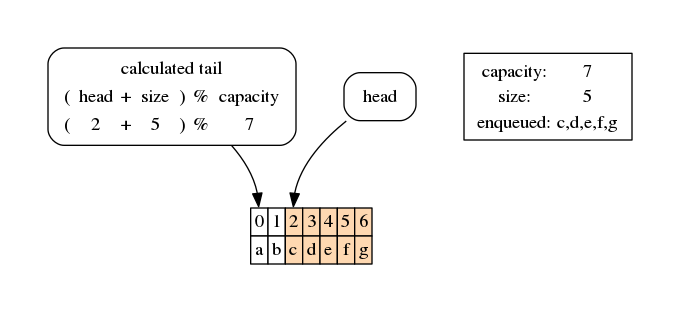

In [16]:
draw_circular_queue(q)

Let's try to enqueue another item: 

In [17]:
q.enqueue('h')

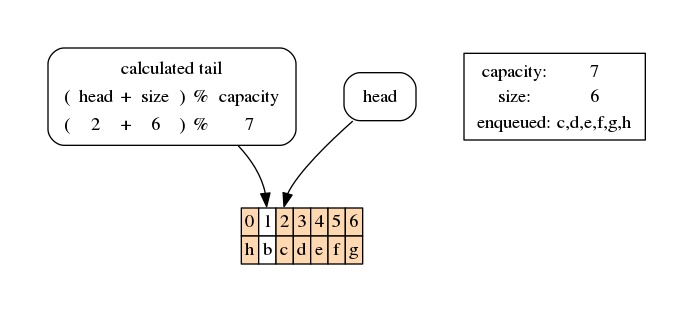

In [18]:
draw_circular_queue(q)

As predicted, `a` was overwritten and the tail is now the reminder of the division between `2 + 5 + 1` and `7`, that is `1`, the index right after the last cell we filled in.

If we now enqueue another item, we reach another extremal situation:

In [19]:
q.enqueue('i')

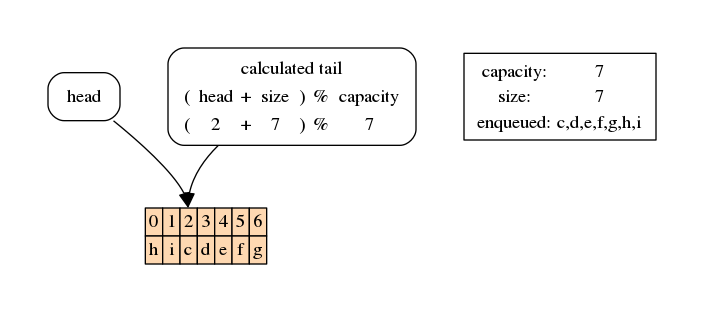

In [20]:
draw_circular_queue(q)

Now the calculated tail is pointing at the head - exactly as when the queue was empty, but now we now the queue instead is full because the `size` equals the `capacity`. In this situation, if we try to enqueue more stuff we should get an error:

In [21]:
try:
    q.enqueue('z')
except Exception as ex:
    print(ex)

Queue is full !


In [22]:
q.dequeue()

'c'

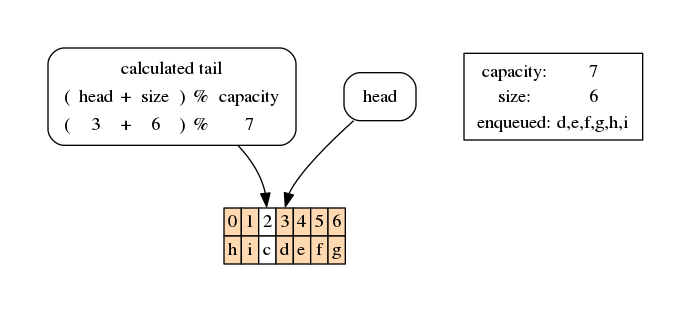

In [23]:
draw_circular_queue(q)

In [24]:
q.dequeue()

'd'

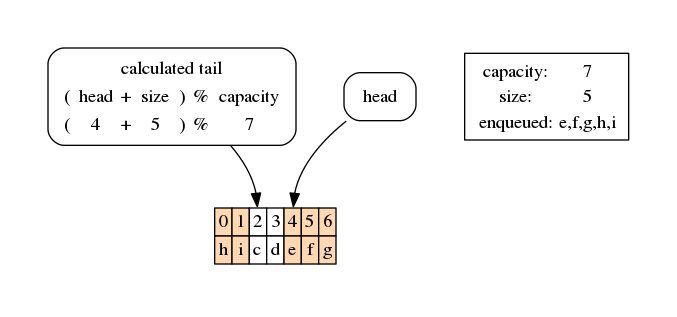

In [25]:
draw_circular_queue(q)

Let's dequeue more stuff until we reach this other extraml situation: 

In [26]:
print(q.dequeue())
print(q.dequeue())

e
f


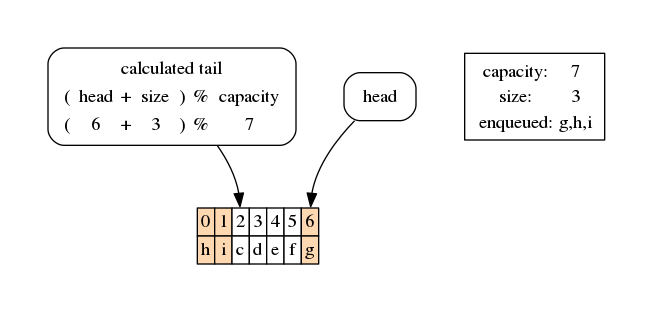

In [27]:
draw_circular_queue(q)

Now dequeuing will move the `head` to the right. We could use an `if` to detect we are at the right bound and set the head to the leftmost index `0` but math again helps us with the modulo operator:

$head = (head + 1) \;\%\; capacity$

With this formula we have:

$head = (6 + 1) \;\% \;7$

which is exactly $0$

In [28]:
q.dequeue()

'g'

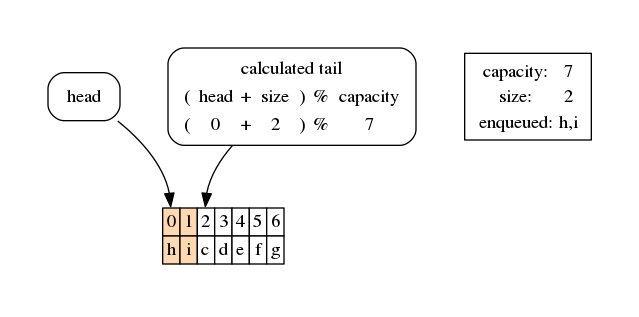

In [29]:
draw_circular_queue(q)

In [30]:
q.dequeue()

'h'

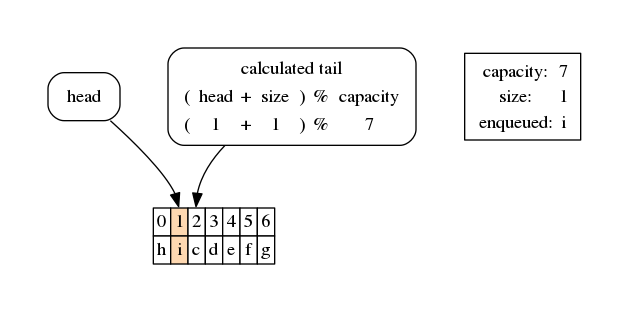

In [31]:
draw_circular_queue(q)

In [32]:
q.dequeue()

'i'

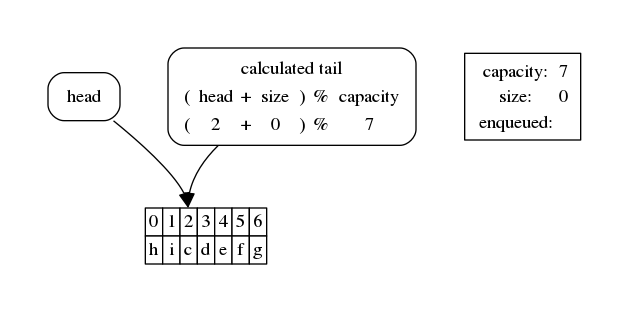

In [33]:
draw_circular_queue(q)

We now have another singular condition, with head equal to tail and size zero. A further attempt at dequeuing should now give us an error:

In [34]:
try:
    q.dequeue()
except Exception as ex:
    print(ex)

Queue is empty !


## 3. Circular span

First try to get an understanding of modulo operator and variables involved by implementing this (simple?) function (it's completely separate from CircularQueue class):

In [35]:
def in_span(i, head, size, capacity):
    """ Return True if index i is included in the circular span 
        between head (INCLUDED) index and calculated tail index (EXCLUDED)
        Otherwise, return False.
    """
    
    h = head
    t = (head + size) % capacity

    return (i >= h and i < h + size) or (h > t and i < t) or (h == t and size == q.capacity)
    

"""
t
h
0123456
abcdefg
"""
assert in_span(0, 0, 0, 7) == False
assert in_span(1, 0, 0, 7) == False
assert in_span(2, 0, 0, 7) == False


"""
ht
0123456
abcdefg
"""

assert in_span(0, 0, 1, 7) == True
assert in_span(1, 0, 1, 7) == False
assert in_span(2, 0, 1, 7) == False

"""
h-t
0123456
abcdefg
"""
assert in_span(0, 0, 2, 7) == True
assert in_span(1, 0, 2, 7) == True
assert in_span(2, 0, 2, 7) == False

"""
  
  h--t
0123456
abcdefg

"""                              
assert in_span(0, 2, 3, 7) == False
assert in_span(1, 2, 3, 7) == False
assert in_span(2, 2, 3, 7) == True
assert in_span(3, 2, 3, 7) == True
assert in_span(4, 2, 3, 7) == True
assert in_span(5, 2, 3, 7) == False
assert in_span(6, 2, 3, 7) == False

"""
  h---t
0123456
abcdefg
"""
assert in_span(0, 2, 4, 7) == False
assert in_span(1, 2, 4, 7) == False
assert in_span(2, 2, 4, 7) == True
assert in_span(3, 2, 4, 7) == True
assert in_span(4, 2, 4, 7) == True
assert in_span(5, 2, 4, 7) == True
assert in_span(6, 2, 4, 7) == False

"""
-t h---   
0123456
abcdefg
"""
assert in_span(0, 3, 5, 7) == True
assert in_span(1, 3, 5, 7) == False
assert in_span(2, 3, 5, 7) == False
assert in_span(3, 3, 5, 7) == True
assert in_span(4, 3, 5, 7) == True
assert in_span(5, 3, 5, 7) == True
assert in_span(6, 3, 5, 7) == True

"""
--t  h- 
0123456
abcdefg
"""
assert in_span(0, 5, 4, 7) == True
assert in_span(1, 5, 4, 7) == True
assert in_span(2, 5, 4, 7) == False
assert in_span(3, 5, 4, 7) == False
assert in_span(4, 5, 4, 7) == False
assert in_span(5, 5, 4, 7) == True
assert in_span(6, 5, 4, 7) == True


"""
  t
--h----
0123456
abcdefg
"""
assert in_span(2, 2, 7, 7) == True

In [35]:
def in_span(i, head, size, capacity):
    """ Return True if index i is included in the circular span 
        between head (INCLUDED) index and calculated tail index (EXCLUDED)
        Otherwise, return False.
    """
    raise Exception('TODO IMPLEMENT ME !')

"""
t
h
0123456
abcdefg
"""
assert in_span(0, 0, 0, 7) == False
assert in_span(1, 0, 0, 7) == False
assert in_span(2, 0, 0, 7) == False


"""
ht
0123456
abcdefg
"""

assert in_span(0, 0, 1, 7) == True
assert in_span(1, 0, 1, 7) == False
assert in_span(2, 0, 1, 7) == False

"""
h-t
0123456
abcdefg
"""
assert in_span(0, 0, 2, 7) == True
assert in_span(1, 0, 2, 7) == True
assert in_span(2, 0, 2, 7) == False

"""
  
  h--t
0123456
abcdefg

"""                              
assert in_span(0, 2, 3, 7) == False
assert in_span(1, 2, 3, 7) == False
assert in_span(2, 2, 3, 7) == True
assert in_span(3, 2, 3, 7) == True
assert in_span(4, 2, 3, 7) == True
assert in_span(5, 2, 3, 7) == False
assert in_span(6, 2, 3, 7) == False

"""
  h---t
0123456
abcdefg
"""
assert in_span(0, 2, 4, 7) == False
assert in_span(1, 2, 4, 7) == False
assert in_span(2, 2, 4, 7) == True
assert in_span(3, 2, 4, 7) == True
assert in_span(4, 2, 4, 7) == True
assert in_span(5, 2, 4, 7) == True
assert in_span(6, 2, 4, 7) == False

"""
-t h---   
0123456
abcdefg
"""
assert in_span(0, 3, 5, 7) == True
assert in_span(1, 3, 5, 7) == False
assert in_span(2, 3, 5, 7) == False
assert in_span(3, 3, 5, 7) == True
assert in_span(4, 3, 5, 7) == True
assert in_span(5, 3, 5, 7) == True
assert in_span(6, 3, 5, 7) == True

"""
--t  h- 
0123456
abcdefg
"""
assert in_span(0, 5, 4, 7) == True
assert in_span(1, 5, 4, 7) == True
assert in_span(2, 5, 4, 7) == False
assert in_span(3, 5, 4, 7) == False
assert in_span(4, 5, 4, 7) == False
assert in_span(5, 5, 4, 7) == True
assert in_span(6, 5, 4, 7) == True


"""
  t
--h----
0123456
abcdefg
"""
assert in_span(2, 2, 7, 7) == True

## 4. Implement CircularQueue

Implement methods in file `circular_queue.py` in the order they are presented, and test them with `circular_queue_test.py`

```bash
python3 -m unittest circular_queue_test
```

In [36]:
# ignore this cell
import jupman
import circular_queue_test
jupman.run(circular_queue_test)


............
----------------------------------------------------------------------
Ran 12 tests in 0.009s

OK
